<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-модели" data-toc-modified-id="Проверка-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка модели</a></span><ul class="toc-item"><li><span><a href="#На-незащифрованных-данных" data-toc-modified-id="На-незащифрованных-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>На незащифрованных данных</a></span></li><li><span><a href="#На-зашифрованных-данных" data-toc-modified-id="На-зашифрованных-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>На зашифрованных данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Защита данных клиентов страховой компании

В данном проекте мы защитим данные клиентов страховой компании «Хоть потоп», разработав такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

При преобразовании данных качество моделей машинного обучения не должно будет ухудшиться.

## Загрузка данных

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
try:
    df = pd.read_csv('D:\\Users\\BlackEdition\\Desktop\Data Science\\'
                     'Обучение в Яндекс\\11. Линейная алгебра\insurance.csv')
except:
    df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


### Вывод

Данные загружены. В данных описаны персональные данные клиентов, их:
   * пол;
   * возраст;
   * уровень заработной платы;
   * количество членов семьи;
   * количество выплаченных страховых взносов.

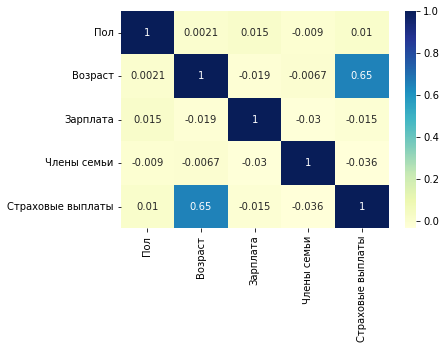

In [5]:
# Построение тепловой карты корреляции
df_plot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Предположение:
предположим, что при умножении признаков на обратимую матрицу качество предсказаний линейной регрессии не изменится. Попробуем это доказать.

Условия:
$$
a = Xw
$$
$$
a_1 = Zw_1
$$
$$
w = (X^T X)^{-1} X^T y
$$
$$
w_1 = (Z^T Z)^{-1} Z^T y
$$
$$
Z = XP
$$
Даказательство:
$$
т.к. a_1 = Zw_1, w_1 = (Z^T Z)^{-1} Z^T y ⇒ a_1 = Z(Z^T Z)^{-1} Z^T y
$$
$$
т.к. Z = XP ⇒ a_1 = XP((XP)^T (XP))^{-1} (XP)^T y
$$
$$
т.к. (AB)^{-1} = B^{-1} A^{-1} ⇒ a_1 = XP(XP)^{-1} ((XP)^T)^{-1} (XP)^T y ⇒ XPP^{-1} X^{-1} ((XP)^T)^{-1} (XP)^T y
$$
$$
т.к. AA^{-1} = E ⇒ XEX^{-1} ((XP)^T)^{-1} (XP)^T y
$$
$$
т.к. (AB)^T = A^T B^T ⇒ XEX^{-1} (P^T X^T)^{-1} P^T X^T y ⇒ XX^{-1} (X)^{-1} (P^T)^{-1} P^T X^T y
$$
$$
т.к. (P^T)^{-1}P^T = E ⇒ XX^{-1} (X^T)^{-1} EX^T y ⇒ X(X^T X)^{-1} X^T y
$$
$$
X(X^T X)^{-1} X^T y = X_w = a ⇒ a = a_1 ⇒ Xw = Zw_1
$$

### Вывод

Из доказательства следует, что при умножении признаков на обратимую матрицу качество линейной регрессии не пострадает.

Даказательство:
$$
т.к. a_1 = Zw_1, w_1 = (Z^T Z)^{-1} Z^T y ⇒ a_1 = Z(Z^T Z)^{-1} Z^T y
$$
$$
т.к. Z = XP ⇒ a_1 = XP(P(X^T X)P)^{-1} (XP)^T y ⇒
$$
$$
XPP^{-1} (X^T X)^{-1} (P^T)^{-1} (XP)^T y ⇒
$$
$$
XE(X^TX)^{-1} (P^T)^{-1} (XP)^T y ⇒
$$
$$
X(X^T X)^{-1} (P^T)^{-1} P^T X^T y ⇒
$$
$$
X(X^T X)^{-1} EX^T y ⇒
$$
$$
X(X^T X)^{-1} X^T y = X_w = a ⇒ a = a_1 ⇒ Xw = Zw_1
$$

## Алгоритм преобразования

**Алгоритм**

Применим следующий алгоритм для шифрования данных клиентов компании:
 - создидим рандомную матрицу А;
 - определим детерминант матрицы А для определения ее обратимости;
 - вычислим обратную матрицу к матрице А (обратимый ключ);
 - умножим клиентские данные на обратимую матрицу А для шифрования данных клиентов.

## Проверка модели

### На незащифрованных данных

In [6]:
# Разбивка данных на обучающие и ключевые признаки
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [7]:
# Разбивка данных на train и valid
(features_train, features_valid,
 target_train, target_valid) = train_test_split(features,
                                                target,
                                                test_size=.25,
                                                random_state=12345)

In [8]:
# Масштабирование данных для регрессии
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)

In [9]:
# Обучение модели Линейной Регрессии
model = LinearRegression()
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
score = r2_score(target_valid, predictions_valid)
display(score)

0.4352275712702667

Коэффициент детерминации модели на незашифрованных данных составил 44%

### На зашифрованных данных

Напишем функцию, которая будет создавать рандомную невырожденную матрицу (шифрующую матрицу) и обратную к ней (матрицу-дешифровщик).

In [10]:
# Функция для создания шифрующей и дешифрующей матрицы
def e_d_matrix(features):
    # Определение количества столбцов матрицы признаков
    n = features.shape[1]
    # Создание рандомной шифрующей матрицы
    encryption_matrix = np.random.rand(n, n)
    # Определение детерминанта
    det = np.linalg.det(encryption_matrix)
    # Создание матрицы, пока детерминант не станет отличным от 0
    while det == 0:
        encryption_matrix = np.random.rand(n, n)
        det = np.linalg.det(encryption_matrix)
    # Создание дешифрующей матрицы
    decryption_matrix = np.linalg.inv(encryption_matrix)
    return encryption_matrix, decryption_matrix

Закодируем признаки путем их умножения на шифрующую матрицу.

In [11]:
encryption_matrix, decryption_matrix = e_d_matrix(features)  # Вызов фунции создания матриц
encryption_features = features @ encryption_matrix  # Шифровка признаков

In [12]:
# Разбивка зашифрованных признаков на train и valid выборки
(features_train, features_valid,
 target_train, target_valid) = train_test_split(encryption_features,
                                                target,
                                                test_size=.25,
                                                random_state=12345)

display(features_train.head())
display(features_valid.head())

,0,1,2,3
3369,28151.841029,30723.965973,14098.170170,4077.557800
1441,44767.031213,48860.043776,22426.320773,6453.132221
571,31949.569397,34869.306127,16003.320322,4612.312521
225,35059.636527,38263.512874,17560.932096,5062.049938
2558,39330.064760,42924.820920,19701.602001,5672.295806


,0,1,2,3
3183,30320.791935,33091.236227,15186.933849,4380.197507
1071,33517.320878,36578.730465,16784.933588,4853.389410
2640,32731.111114,35722.593345,16393.799642,4730.775276
2282,27046.328790,29518.696724,13548.894510,3898.005377
1595,31103.632143,33944.944256,15577.437839,4499.589364


In [13]:
# Масштабирование данных
scaler = StandardScaler()
scaler.fit(encryption_features)
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)

Обучим модель на зашифрованных данных.

In [14]:
# Обучение модели Линейной Регрессии
model = LinearRegression()
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
score = r2_score(target_valid, predictions_valid)
display(score)

0.43522757127037504

Коэффициент детерминации модели на зашифрованных данных составил 44%

### Вывод

Из полученных опытных путем данных видно, что шифрование признаков путем их умножения на обратимую матрицу не влияет на качество предсказания модели.

## Общий вывод

В данной работе мы составили алгоритм преобразования (шифрования) клиентских данных страховой компании "Хоть потоп". С целью шифрования нами была проверена теория о том, что при умножении матрицы клиентских данных на обратимую матрицу, мы сможем получить зашифрованные данные, которые можно дешифровать путем их обратного умножения на обратную матрицу.

Также нами был исследован факт того, что зашифрованные данные не влияют на предсказательные метрики моделей машинного обучения. Так, коэффициент детерминации модели линейной регрессии, обученной на незашифрованных данных равен 44%, что аналогично результату работы аналогичной модели, обученной на зашифрованных данных.

В связи с изложеннным мы можем зашифровывать клиентские данные в целях из защиты без боязни в потере качества метрик и предсказательной силы существующих или будущих моделей.